<a href="https://colab.research.google.com/github/akashadak300/Traffic-Sign-Recognition/blob/main/ivp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IoU for detected box (186, 0, 239, 241) and ground truth (175, 2, 261, 244): 0.890262148935507


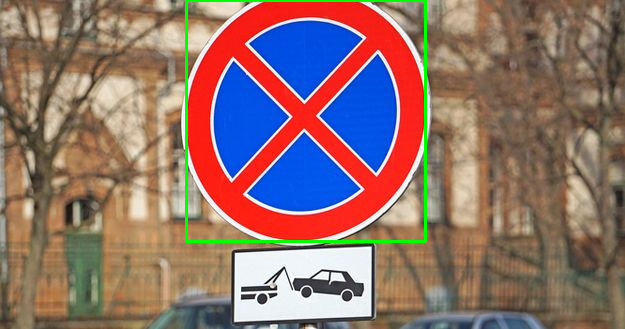

IoU for detected box (185, 101, 117, 118) and ground truth (180, 97, 127, 126): 0.8627671541057368


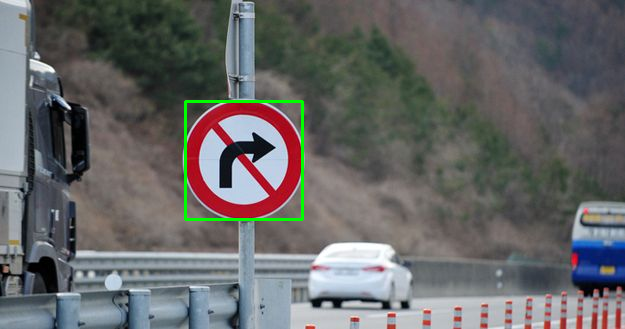

IoU for detected box (112, 128, 59, 14) and ground truth (55, 30, 161, 119): 0.043112897332846185
IoU for detected box (71, 32, 109, 112) and ground truth (55, 30, 161, 119): 0.6371940080379979


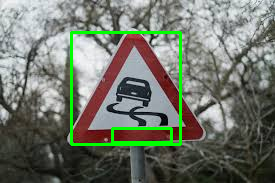

IoU for detected box (155, 91, 36, 19) and ground truth (68, 70, 42, 40): 0.0
IoU for detected box (72, 72, 35, 37) and ground truth (68, 70, 42, 40): 0.7708333333333334
IoU for detected box (107, 16, 63, 83) and ground truth (68, 70, 42, 40): 0.012752858399296393


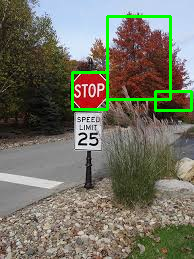

IoU for detected box (84, 143, 20, 39) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (43, 143, 31, 33) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (0, 143, 47, 39) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (93, 135, 103, 47) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (205, 96, 33, 14) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (43, 29, 80, 70) and ground truth (32, 24, 100, 85): 0.6588235294117647


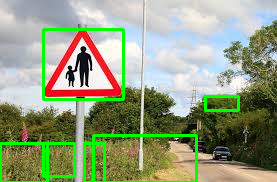

IoU for detected box (28, 8, 115, 131) and ground truth (16, 4, 137, 140): 0.7854535974973931


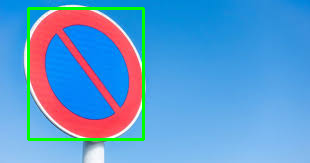

IoU for detected box (252, 32, 32, 62) and ground truth (246, 30, 42, 54): 0.642967542503864


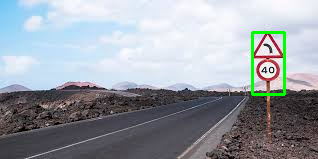

IoU for detected box (127, 161, 32, 7) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (175, 152, 125, 16) and ground truth (234, 54, 27, 48): 0.0


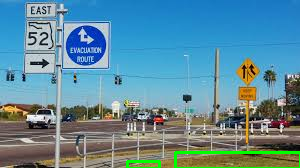

IoU for detected box (69, 191, 23, 38) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (43, 180, 21, 34) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (0, 142, 38, 55) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (151, 139, 14, 33) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (91, 138, 16, 43) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (26, 82, 48, 40) and ground truth (24, 75, 50, 50): 0.768


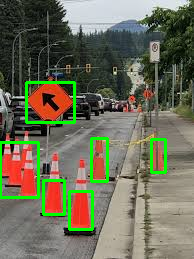

IoU for detected box (287, 136, 23, 15) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (134, 123, 15, 20) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (231, 103, 42, 13) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (314, 97, 19, 16) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (305, 52, 28, 28) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (134, 13, 40, 43) and ground truth (130, 7, 47, 53): 0.6904857486953031


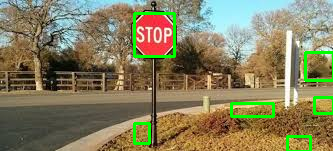

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import xml.etree.ElementTree as ET

# Paths to folders
input_folder = 'imgs1'  # Folder containing the images
output_folder = 'imgs1/output'  # Folder to save output images with detections
annotations_folder = 'annotations'  # Folder containing XML annotations

# Get a list of image files in the folder (limit to 10 images)
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][:10]

# Define color ranges for traffic signs (adjust as needed)
color_ranges = {
    'red': ((0, 100, 100), (10, 255, 255)),
    'red2': ((160, 100, 100), (179, 255, 255)),  # Handle red hue at the upper end
    'yellow': ((20, 100, 100), (30, 255, 255)),
    'green': ((35, 100, 100), (85, 255, 255)),
    # Add more color ranges as needed
}

# Function to calculate Intersection over Union (IoU)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    # Compute intersection area
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute areas of the bounding boxes
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    # Compute IoU
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Function to parse XML annotations to get ground truth boxes
def parse_annotations(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    boxes = []
    for obj in root.findall('object'):
        xmin = int(float(obj.find('bndbox/xmin').text))
        ymin = int(float(obj.find('bndbox/ymin').text))
        xmax = int(float(obj.find('bndbox/xmax').text))
        ymax = int(float(obj.find('bndbox/ymax').text))
        boxes.append((xmin, ymin, xmax - xmin, ymax - ymin))  # (x, y, width, height)
    return boxes

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Process each image in the folder
for img_file in image_files:
    # Load the input image
    image_path = os.path.join(input_folder, img_file)
    base_name = os.path.splitext(img_file)[0]  # Get the file name without extension
    annotation_path = os.path.join(annotations_folder, base_name + '.xml')
    image = cv2.imread(image_path)

    # Check if the annotation file exists
    if not os.path.exists(annotation_path):
        print(f"Annotation file not found for image {img_file}. Skipping this image.")
        continue

    # Parse ground truth boxes
    ground_truth_boxes = parse_annotations(annotation_path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Initialize an empty mask for combining colors
    combined_mask = np.zeros_like(hsv_image[:, :, 0])

    # Iterate through color ranges and create masks for each color
    for color_name, (lower_bound, upper_bound) in color_ranges.items():
        mask = cv2.inRange(hsv_image, np.array(lower_bound), np.array(upper_bound))
        combined_mask |= mask

    # Find contours in the combined mask
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store detected traffic signs and bounding boxes
    detected_signs = []
    detected_boxes = []

    # Iterate through the contours
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold as needed
            # Get the coordinates of the bounding rectangle around the contour
            x, y, w, h = cv2.boundingRect(contour)
            detected_boxes.append((x, y, w, h))

            # Draw a rectangle around the detected sign on the original image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Extract the detected sign region
            detected_sign = image[y:y + h, x:x + w]

            # Append the detected sign to the list
            detected_signs.append(detected_sign)

    # Calculate IoU for each detected box against ground truth boxes
    for detected_box in detected_boxes:
        for gt_box in ground_truth_boxes:
            iou = calculate_iou(detected_box, gt_box)
            print(f"IoU for detected box {detected_box} and ground truth {gt_box}: {iou}")

    # Display the original image with detected signs
    cv2_imshow(image)

    # Save the original image with rectangles drawn around detected signs
    output_image_path = os.path.join(output_folder, f"output_{img_file}")
    cv2.imwrite(output_image_path, image)

    # Save each detected traffic sign
    for i, sign in enumerate(detected_signs):
        detected_sign_path = os.path.join(output_folder, f"detected_sign_{base_name}_{i}.jpg")
        cv2.imwrite(detected_sign_path, sign)


IoU for detected box (234, 246, 138, 76) and ground truth (175, 2, 261, 244): 0.0
IoU for detected box (72, 198, 13, 28) and ground truth (175, 2, 261, 244): 0.0
IoU for detected box (51, 176, 17, 18) and ground truth (175, 2, 261, 244): 0.0
IoU for detected box (243, 129, 122, 86) and ground truth (175, 2, 261, 244): 0.16475095785440613
IoU for detected box (210, 57, 83, 126) and ground truth (175, 2, 261, 244): 0.16421707179197287
IoU for detected box (316, 50, 85, 127) and ground truth (175, 2, 261, 244): 0.1695088248225614
IoU for detected box (245, 17, 121, 87) and ground truth (175, 2, 261, 244): 0.16530054644808742
IoU for detected box (186, 0, 240, 241) and ground truth (175, 2, 261, 244): 0.8939592294744717
IoU for detected box (160, 0, 271, 246) and ground truth (175, 2, 261, 244): 0.9201308075302713


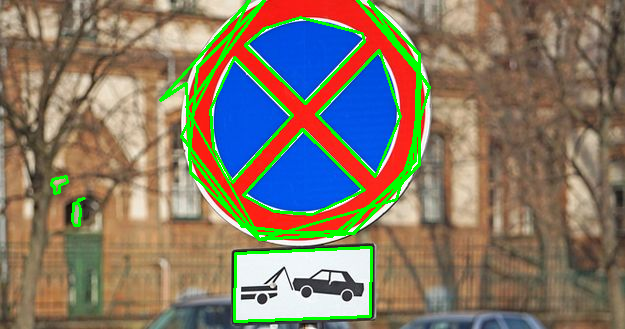

IoU for detected box (291, 297, 108, 13) and ground truth (180, 97, 127, 126): 0.0
IoU for detected box (599, 266, 16, 9) and ground truth (180, 97, 127, 126): 0.0
IoU for detected box (54, 110, 31, 70) and ground truth (180, 97, 127, 126): 0.0
IoU for detected box (185, 100, 118, 119) and ground truth (180, 97, 127, 126): 0.8775153105861767
IoU for detected box (29, 52, 26, 22) and ground truth (180, 97, 127, 126): 0.0
IoU for detected box (231, 13, 21, 65) and ground truth (180, 97, 127, 126): 0.0
IoU for detected box (68, 0, 185, 258) and ground truth (180, 97, 127, 126): 0.168665419738145


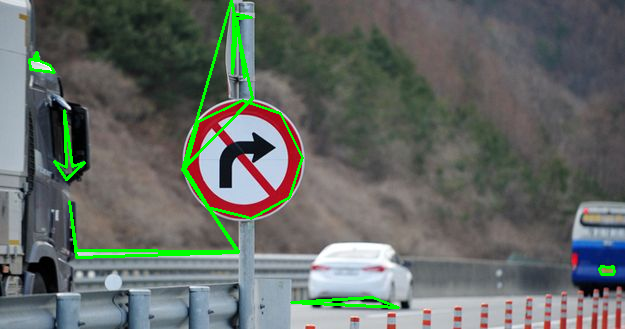

IoU for detected box (169, 118, 83, 65) and ground truth (55, 30, 161, 119): 0.06308178551327012
IoU for detected box (5, 40, 27, 63) and ground truth (55, 30, 161, 119): 0.0
IoU for detected box (70, 31, 133, 113) and ground truth (55, 30, 161, 119): 0.7844355133357691
IoU for detected box (0, 4, 31, 53) and ground truth (55, 30, 161, 119): 0.0
IoU for detected box (149, 0, 101, 86) and ground truth (55, 30, 161, 119): 0.15572988004814675
IoU for detected box (32, 0, 41, 75) and ground truth (55, 30, 161, 119): 0.03780806572068708


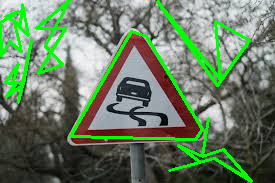

IoU for detected box (47, 220, 85, 39) and ground truth (68, 70, 42, 40): 0.0
IoU for detected box (0, 204, 58, 55) and ground truth (68, 70, 42, 40): 0.0
IoU for detected box (58, 150, 37, 57) and ground truth (68, 70, 42, 40): 0.0
IoU for detected box (73, 83, 32, 16) and ground truth (68, 70, 42, 40): 0.3047619047619048
IoU for detected box (62, 39, 56, 71) and ground truth (68, 70, 42, 40): 0.4225352112676056


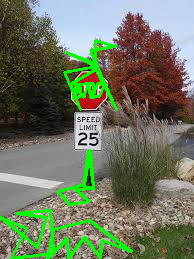

IoU for detected box (0, 118, 42, 39) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (86, 95, 52, 62) and ground truth (32, 24, 100, 85): 0.05812274368231047
IoU for detected box (51, 38, 62, 52) and ground truth (32, 24, 100, 85): 0.37929411764705884
IoU for detected box (223, 21, 54, 57) and ground truth (32, 24, 100, 85): 0.0
IoU for detected box (43, 18, 103, 159) and ground truth (32, 24, 100, 85): 0.43698012939001846


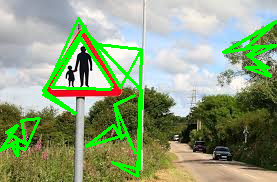

IoU for detected box (24, 4, 122, 138) and ground truth (16, 4, 137, 140): 0.8777893639207508


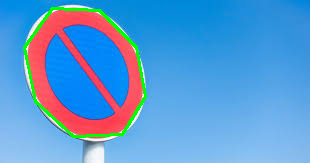

IoU for detected box (269, 121, 41, 28) and ground truth (246, 30, 42, 54): 0.0
IoU for detected box (8, 100, 99, 35) and ground truth (246, 30, 42, 54): 0.0
IoU for detected box (259, 62, 18, 17) and ground truth (246, 30, 42, 54): 0.1349206349206349
IoU for detected box (256, 35, 24, 21) and ground truth (246, 30, 42, 54): 0.2222222222222222


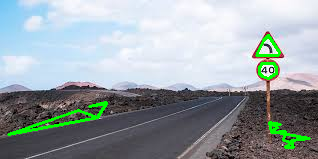

IoU for detected box (82, 138, 31, 30) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (132, 107, 114, 30) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (58, 104, 74, 64) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (0, 103, 58, 34) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (215, 48, 31, 81) and ground truth (234, 54, 27, 48): 0.17827298050139276
IoU for detected box (66, 25, 40, 41) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (25, 18, 30, 32) and ground truth (234, 54, 27, 48): 0.0
IoU for detected box (27, 3, 41, 14) and ground truth (234, 54, 27, 48): 0.0


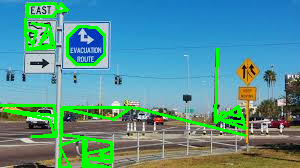

IoU for detected box (63, 227, 33, 10) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (12, 121, 44, 40) and ground truth (24, 75, 50, 50): 0.030977734753146177
IoU for detected box (116, 114, 55, 145) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (42, 93, 17, 18) and ground truth (24, 75, 50, 50): 0.1224
IoU for detected box (8, 91, 125, 44) and ground truth (24, 75, 50, 50): 0.2698412698412698
IoU for detected box (149, 41, 14, 43) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (158, 36, 36, 89) and ground truth (24, 75, 50, 50): 0.0
IoU for detected box (12, 11, 74, 94) and ground truth (24, 75, 50, 50): 0.1885369532428356


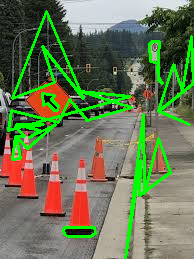

IoU for detected box (214, 100, 113, 47) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (195, 70, 60, 21) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (0, 53, 152, 54) and ground truth (130, 7, 47, 53): 0.014604077761972499
IoU for detected box (275, 30, 18, 80) and ground truth (130, 7, 47, 53): 0.0
IoU for detected box (120, 8, 63, 58) and ground truth (130, 7, 47, 53): 0.6603620643069441
IoU for detected box (20, 6, 64, 48) and ground truth (130, 7, 47, 53): 0.0


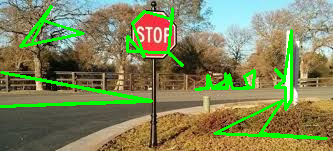

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import xml.etree.ElementTree as ET

# Paths to folders
input_folder = 'imgs1'  # Folder containing the images
output_folder = 'imgs1/output'  # Folder to save output images with detections
annotations_folder = 'annotations'  # Folder containing XML annotations

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of image files in the folder (limit to 10 images)
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))][:10]

# Function to calculate Intersection over Union (IoU)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    # Compute intersection area
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute areas of the bounding boxes
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    # Compute IoU
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Function to parse XML annotations to get ground truth boxes
def parse_annotations(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    boxes = []
    for obj in root.findall('object'):
        xmin = int(float(obj.find('bndbox/xmin').text))
        ymin = int(float(obj.find('bndbox/ymin').text))
        xmax = int(float(obj.find('bndbox/xmax').text))
        ymax = int(float(obj.find('bndbox/ymax').text))
        boxes.append((xmin, ymin, xmax - xmin, ymax - ymin))  # (x, y, width, height)
    return boxes

# Process each image in the folder
for img_file in image_files:
    # Load the input image
    image_path = os.path.join(input_folder, img_file)
    base_name = os.path.splitext(img_file)[0]  # Get the file name without extension
    annotation_path = os.path.join(annotations_folder, base_name + '.xml')
    image = cv2.imread(image_path)

    # Check if the annotation file exists
    if not os.path.exists(annotation_path):
        print(f"Annotation file not found for image {img_file}. Skipping this image.")
        continue

    # Parse ground truth boxes
    ground_truth_boxes = parse_annotations(annotation_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edges image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store detected traffic signs and bounding boxes
    detected_signs = []
    detected_boxes = []

    # Iterate through the contours
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:  # Adjust the area threshold as needed
            # Approximate contour to reduce the number of vertices
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Detect triangle-shaped traffic signs
            if len(approx) == 3:
                shape = "triangle"
            elif len(approx) == 4:
                shape = "rectangle"
            elif len(approx) > 4:
                shape = "circle"  # Rough approximation for circles

            # Only process if the contour matches a traffic sign shape
            if shape in ["triangle", "rectangle", "circle"]:
                # Get the coordinates of the minimum bounding rectangle
                x, y, w, h = cv2.boundingRect(contour)
                detected_box = (x, y, w, h)

                # Draw the shape outline on the image
                cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

                # Extract the detected sign region
                detected_sign = image[y:y + h, x:x + w]
                detected_boxes.append(detected_box)
                detected_signs.append(detected_sign)

    # Calculate IoU for each detected box against ground truth boxes
    for detected_box in detected_boxes:
        for gt_box in ground_truth_boxes:
            iou = calculate_iou(detected_box, gt_box)
            print(f"IoU for detected box {detected_box} and ground truth {gt_box}: {iou}")

    # Display the original image with detected signs (optional)
    cv2_imshow(image)

    # Save the original image with rectangles drawn around detected signs
    output_image_path = os.path.join(output_folder, f"output_{img_file}")
    cv2.imwrite(output_image_path, image)

    # Save each detected traffic sign
    for i, sign in enumerate(detected_signs):
        detected_sign_path = os.path.join(output_folder, f"detected_sign_{base_name}_{i}.jpg")
        cv2.imwrite(detected_sign_path, sign)
